In [1]:
import os
import sys

#Pega o caminho absoluto para a pasta raiz do projeto (OBESITY_PROJECT)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

#Adiciona a pasta raiz (que contém 'src') ao caminho de busca do Python
if project_root not in sys.path:
    sys.path.append(project_root)
    
from src.utils.db_connection import get_data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

#### Importando os dados da tabela silver que esta criada no PostgreSQL

In [3]:
#Query simples para ler a tabela silver do banco de dados
query = "SELECT * FROM obesity_silver"
df_silver = get_data(query)

In [4]:
print("Dados da tabela silver carregados com sucesso:")
print(df_silver.shape)
df_silver.head()

Dados da tabela silver carregados com sucesso:
(2111, 17)


,genero,idade,altura_m,peso_kg,historico_familiar,consumo_frequente_alimentos_caloricos,consumo_frequente_vegetais,numero_refeicoes_principais_dia,consumo_lanches_entre_refeicoes,habito_fumar,consumo_diario_agua,monitora_caloria_diaria,frequencia_semanal_atividade_fisica,tempo_uso_dispositivo,consumo_bebida_alcoolica,transporte_habitual,classe_peso_corporal
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Peso Normal
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Peso Normal
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Peso Normal
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Sobrepeso Nível I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Sobrepeso Nível II


In [5]:
df_silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   genero                                 2111 non-null   object 
 1   idade                                  2111 non-null   int64  
 2   altura_m                               2111 non-null   float64
 3   peso_kg                                2111 non-null   float64
 4   historico_familiar                     2111 non-null   object 
 5   consumo_frequente_alimentos_caloricos  2111 non-null   object 
 6   consumo_frequente_vegetais             2111 non-null   int64  
 7   numero_refeicoes_principais_dia        2111 non-null   int64  
 8   consumo_lanches_entre_refeicoes        2111 non-null   object 
 9   habito_fumar                           2111 non-null   object 
 10  consumo_diario_agua                    2111 non-null   int64  
 11  moni

In [6]:
gender_counts = df_silver['genero'].value_counts()
fig = px.pie(
    names=gender_counts.index, 
    values=gender_counts.values, 
    title='Distribuição de Gênero')
fig.show()

In [7]:
from PIL import Image, ImageDraw, ImageOps

output_dir = os.path.join(project_root, 'reports', 'figures')
os.makedirs(output_dir, exist_ok=True)

#Configuração de cores
cor_fundo = '#0E1117'
cor_feminino = '#D08CFF' 
cor_masculino = '#00FFA3' 
cor_texto = '#FFFFFF'

gender_counts = df_silver['genero'].value_counts().reset_index()
gender_counts.columns = ['genero', 'Total']


fig = px.pie(
    gender_counts,
    values='Total',
    names='genero',
    hole=0.7,
    color='genero',
    color_discrete_map={'Feminino': cor_feminino, 'Masculino': cor_masculino}
)

#Estilizando para ficar com o tema dark mode da apresentação
fig.update_traces(
    textposition='outside', 
    textinfo='percent+label', 
    textfont_color=cor_texto,
    textfont_size=24, 
    textfont_family="Arial Black",
    marker=dict(line=dict(color=cor_fundo, width=5)),
    pull=[0.02, 0.02]
)

total_pacientes = gender_counts['Total'].sum()

fig.update_layout(
    title_text="<b>Distribuição por Gênero</b>",
    title_font_color=cor_texto,
    title_font_family="Arial",
    title_font_size=28,
    title_x=0.5, #Centraliza o texto

    #Configuração do Fundo
    paper_bgcolor=cor_fundo,
    plot_bgcolor=cor_fundo,

    showlegend=False,

    margin=dict(t=100, b=80, l=100, r=100),

    annotations=[dict(
        text=f"<span style='font-size:40px; font-weight:bold; color:{cor_texto}'>{total_pacientes}</span><br><span style='font-size:20px; color:#A0A0A0'>Pacientes</span>",
        x=0.5, y=0.5, font_size=20, showarrow=False
    )]
)

#Definindo caminhos completos usando output_dir
temp_filename = os.path.join(output_dir, "temp_chart.png")
final_filename = os.path.join(output_dir, "distribuicao_genero_arredondado.png")

#Salva a imagem base
fig.write_image(temp_filename, width=1200, height=800, scale=3)

#Função de arredondamento
def add_rounded_corners(image_path, output_path, radius=60):
    img = Image.open(image_path)
    
    mask = Image.new('L', img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.rounded_rectangle([(0, 0), img.size], radius=radius, fill=255)
    
    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)
    
    output.save(output_path)
    print(f"Imagem salva em: {output_path}")

#Aplica o efeito e salva o arquivo final na pasta correta
add_rounded_corners(temp_filename, final_filename, radius=100)

Imagem salva em: d:\Cursos\FIAP\obesity_project\reports\figures\distribuicao_genero_arredondado.png


In [8]:
#Verificando a distribuição por classe de peso corporal
distribuicao_classe = df_silver.groupby(['classe_peso_corporal', 'genero']).size().reset_index(name='count')
fig = px.bar(
    distribuicao_classe,
    x='classe_peso_corporal',
    y='count',
    color='genero',
    title='Distribuição por Classe de Peso Corporal e Gênero',
    color_discrete_map={'Feminino': cor_feminino, 'Masculino': cor_masculino}
)

fig.show()

In [9]:
#Configurações para o gráfico de barras da distribuição por classe de peso corporal e gênero
output_dir = os.path.join(project_root, 'reports', 'figures')
os.makedirs(output_dir, exist_ok=True)

cor_fundo = '#0E1117'
cor_feminino = '#D08CFF'
cor_masculino = '#00FFA3'
cor_texto = '#FFFFFF'

#Ordenando as classes para o gráfico seguir uma lógica visual
ordem_classes = [
    'Peso Insuficiente', 'Peso Normal', 
    'Sobrepeso Nível I', 'Sobrepeso Nível II', 
    'Obesidade Tipo I', 'Obesidade Tipo II', 'Obesidade Tipo III'
]

#Garantindo que o DF siga essa ordem

df_silver_sorted = df_silver.copy()

df_silver_sorted = df_silver_sorted[df_silver_sorted['classe_peso_corporal'].isin(ordem_classes)]

#Gerando o Histograma
fig = px.histogram(
    df_silver_sorted, 
    x="classe_peso_corporal", 
    color="genero", 
    barmode="group", 
    category_orders={"classe_peso_corporal": ordem_classes},
    color_discrete_map={'Female': cor_feminino, 'Male': cor_masculino},
    text_auto=True
)

#Estilização para manter o tema dark mode da apresentação
fig.update_layout(
    title_text="<b>Distribuição Original das Classes por Gênero</b>",
    title_font_color=cor_texto,
    title_font_size=24,
    title_x=0.5,
    
    #Fundo
    paper_bgcolor=cor_fundo,
    plot_bgcolor=cor_fundo,
    
    #Legenda
    legend_title_text="",
    legend_font_color=cor_texto,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    
    #Eixos
    xaxis=dict(
        title="", 
        tickfont=dict(color=cor_texto, size=14),
        showgrid=False 
    ),
    yaxis=dict(
        title="Quantidade de Pacientes",
        title_font=dict(color=cor_texto),
        tickfont=dict(color=cor_texto),
        gridcolor='#333333',
        showgrid=True
    ),
    
    margin=dict(t=80, b=50, l=50, r=50),
    bargap=0.15 
)

#Ajuste da cor dos números nas barras
fig.update_traces(
    textfont=dict(size=12, color=cor_texto),
    textposition='outside',
    marker_line_width=0 
)

#Salvando
final_filename = os.path.join(output_dir, "distribuicao_classes.png")
fig.write_image(final_filename, width=1400, height=800, scale=3)

print(f"Gráfico salvo em: {final_filename}")

Gráfico salvo em: d:\Cursos\FIAP\obesity_project\reports\figures\distribuicao_classes.png


In [10]:
df_silver[["peso_kg", "altura_m"]].describe()

,peso_kg,altura_m
count,2111.000000,2111.000000
mean,86.586058,1.701677
std,26.191172,0.093305
min,39.000000,1.450000
25%,65.473343,1.630000
50%,83.000000,1.700499
75%,107.430682,1.768464
max,173.000000,1.980000


#### Criando novas features

In [11]:
#Criando indice de massa corporal (IMC)
df_silver['IMC'] = df_silver['peso_kg'] / (df_silver['altura_m'] ** 2)

##### Avaliando o conteúdo das colunas categóricas e transformando para gerar novas features

In [12]:
df_silver['consumo_frequente_alimentos_caloricos'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
df_silver['consumo_lanches_entre_refeicoes'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [14]:
df_silver['consumo_bebida_alcoolica'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [15]:
#Mapeamento de risco para variáveis categóricas
mapa_risco = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'yes': 2,
    'Always': 3
}

In [16]:
#Criando indice de estilo de vida (IEV)
df_silver['indice_estilo_vida'] = (df_silver['consumo_frequente_vegetais'] + df_silver['consumo_diario_agua'] + df_silver['frequencia_semanal_atividade_fisica'] - df_silver['tempo_uso_dispositivo'])

In [17]:
df_silver['risco_alimentos_caloricos_num'] = df_silver['consumo_frequente_alimentos_caloricos'].map(mapa_risco)
df_silver['risco_lanches_num'] = df_silver['consumo_lanches_entre_refeicoes'].map(mapa_risco)
df_silver['risco_alcool_num'] = df_silver['consumo_bebida_alcoolica'].map(mapa_risco)

In [18]:
#Criando indice de risco alimentar (IRA)
df_silver['indice_risco_alimentar'] = (
    df_silver['risco_alimentos_caloricos_num'] + 
    df_silver['risco_lanches_num'] +
    df_silver['risco_alcool_num']
)

In [19]:
#Comportamento Saudável (Binário)
df_silver["comportamento_saudavel"] = (df_silver["indice_estilo_vida"] > df_silver["indice_estilo_vida"].mean()).astype(int)


In [20]:
# --- 4. VERIFICAÇÃO ---
print("Novas features numéricas criadas:")
print(df_silver[['indice_estilo_vida', 'indice_risco_alimentar', 'comportamento_saudavel']].head())

print("\nDescrição do Índice de Risco:")
print(df_silver['indice_risco_alimentar'].describe())

Novas features numéricas criadas:
   indice_estilo_vida  indice_risco_alimentar  comportamento_saudavel
0                   3                       1                       0
1                   9                       2                       1
2                   5                       3                       1
3                   7                       3                       1
4                   4                       2                       0

Descrição do Índice de Risco:
count    2111.000000
mean        3.639981
std         0.917545
min         0.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         7.000000
Name: indice_risco_alimentar, dtype: float64


In [21]:
df_silver.head()

,genero,idade,altura_m,peso_kg,historico_familiar,consumo_frequente_alimentos_caloricos,consumo_frequente_vegetais,numero_refeicoes_principais_dia,consumo_lanches_entre_refeicoes,habito_fumar,...,consumo_bebida_alcoolica,transporte_habitual,classe_peso_corporal,IMC,indice_estilo_vida,risco_alimentos_caloricos_num,risco_lanches_num,risco_alcool_num,indice_risco_alimentar,comportamento_saudavel
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,...,no,Public_Transportation,Peso Normal,24.386526,3,0,1,0,1,0
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,...,Sometimes,Public_Transportation,Peso Normal,24.238227,9,0,1,1,2,1
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,...,Frequently,Public_Transportation,Peso Normal,23.765432,5,0,1,2,3,1
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,...,Frequently,Walking,Sobrepeso Nível I,26.851852,7,0,1,2,3,1
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,...,Sometimes,Public_Transportation,Sobrepeso Nível II,28.342381,4,0,1,1,2,0


#### Visualizando o comportamento das novas features

In [22]:
pd.crosstab(df_silver["comportamento_saudavel"], df_silver["classe_peso_corporal"])

classe_peso_corporal,Obesidade Tipo I,Obesidade Tipo II,Obesidade Tipo III,Peso Insuficiente,Peso Normal,Sobrepeso Nível I,Sobrepeso Nível II
comportamento_saudavel,,,,,,,
0,177,129,77,111,122,115,133
1,174,168,247,161,165,175,157


In [23]:
(df_silver
 .groupby("classe_peso_corporal")["comportamento_saudavel"]
 .mean()
 .sort_values(ascending=False)
)

classe_peso_corporal
Obesidade Tipo III    0.762346
Sobrepeso Nível I     0.603448
Peso Insuficiente     0.591912
Peso Normal           0.574913
Obesidade Tipo II     0.565657
Sobrepeso Nível II    0.541379
Obesidade Tipo I      0.495726
Name: comportamento_saudavel, dtype: float64

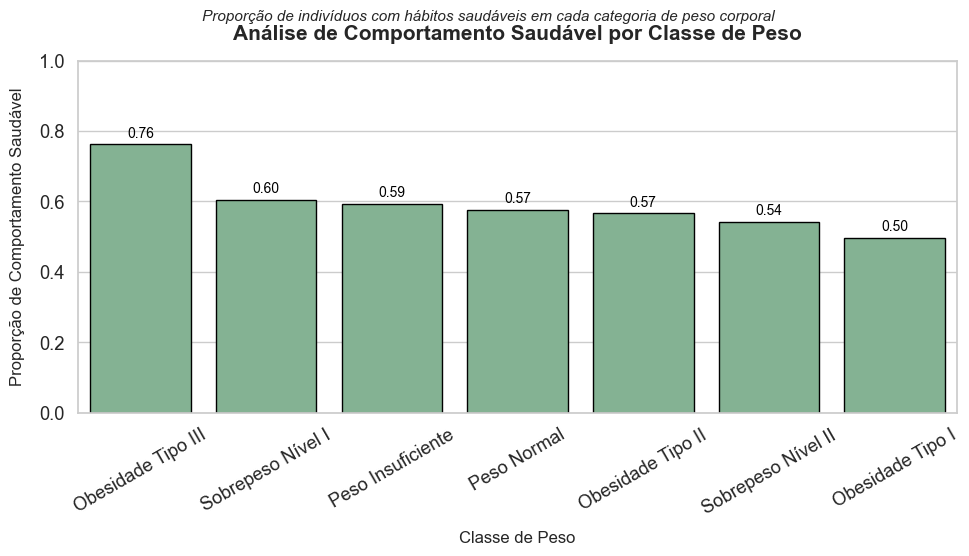

In [24]:
output_dir = os.path.join(project_root, 'reports', 'figures')
os.makedirs(output_dir, exist_ok=True)
#Proporção de Comportamento Saudável por Classe de Peso
saudavel_por_classe = (
    df_silver.groupby("classe_peso_corporal")["comportamento_saudavel"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

#Configuração de estilo (mesmo padrão dos anteriores)
sns.set(style="whitegrid", palette="crest", font_scale=1.2)

#Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar = sns.barplot(
    data=saudavel_por_classe,
    x="classe_peso_corporal",
    y="comportamento_saudavel",
    edgecolor="black",
    ax=ax
)

#Adiciona rótulos nos topos das barras
for p in bar.patches:
    bar.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        xytext=(0, 3),
        textcoords="offset points"
    )

#Título e rótulos formatados
plt.title(
    "Análise de Comportamento Saudável por Classe de Peso",
    fontsize=15, weight='bold', pad=15
)
plt.suptitle(
    "Proporção de indivíduos com hábitos saudáveis em cada categoria de peso corporal",
    fontsize=11, style='italic', y=0.93
)
plt.xlabel("Classe de Peso", fontsize=12, labelpad=10)
plt.ylabel("Proporção de Comportamento Saudável", fontsize=12, labelpad=10)
plt.ylim(0, 1)
plt.xticks(rotation=30)
fig.tight_layout()
fig.savefig(os.path.join(output_dir, 'comportamento_saudavel.png'), dpi=300, bbox_inches="tight")
plt.show()

#### Refinamento da Variável-Alvo — Correção com Base na OMS

Durante a análise exploratória, foi identificado um vazamento de dados (data leakage) na variável-alvo original (classe_peso_corporal). Foi comprovado que os critérios de classificação do IMC variavam entre gêneros, invalidando a variável para uma modelagem preditiva imparcial. Para garantir consistência científica..., etc. \
Link: https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight

In [25]:
#Criando uma nova variável alvo
def classificar_imc_oms(imc):
    if imc < 18.5:
        return "Peso Insuficiente"
    elif imc < 25:
        return "Peso Normal"
    elif imc < 30:
        return "Sobrepeso"
    elif imc < 35:
        return "Obesidade Grau I"
    elif imc < 40:
        return "Obesidade Grau II"
    else:
        return "Obesidade Grau III"

df_silver["classe_peso_oms"] = df_silver["IMC"].apply(classificar_imc_oms)

In [26]:
#Validação da nova variável
print(df_silver["classe_peso_oms"].value_counts())

classe_peso_oms
Sobrepeso             566
Obesidade Grau I      368
Obesidade Grau II     338
Peso Normal           300
Peso Insuficiente     271
Obesidade Grau III    268
Name: count, dtype: int64


In [27]:
df_silver.shape

(2111, 25)

#### Validação visual da classificação orginal (Obesity) e da classficação atualizada de acordo com o OMS

C:\Users\lo-ru\AppData\Local\Temp\ipykernel_20172\131404149.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\lo-ru\AppData\Local\Temp\ipykernel_20172\131404149.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




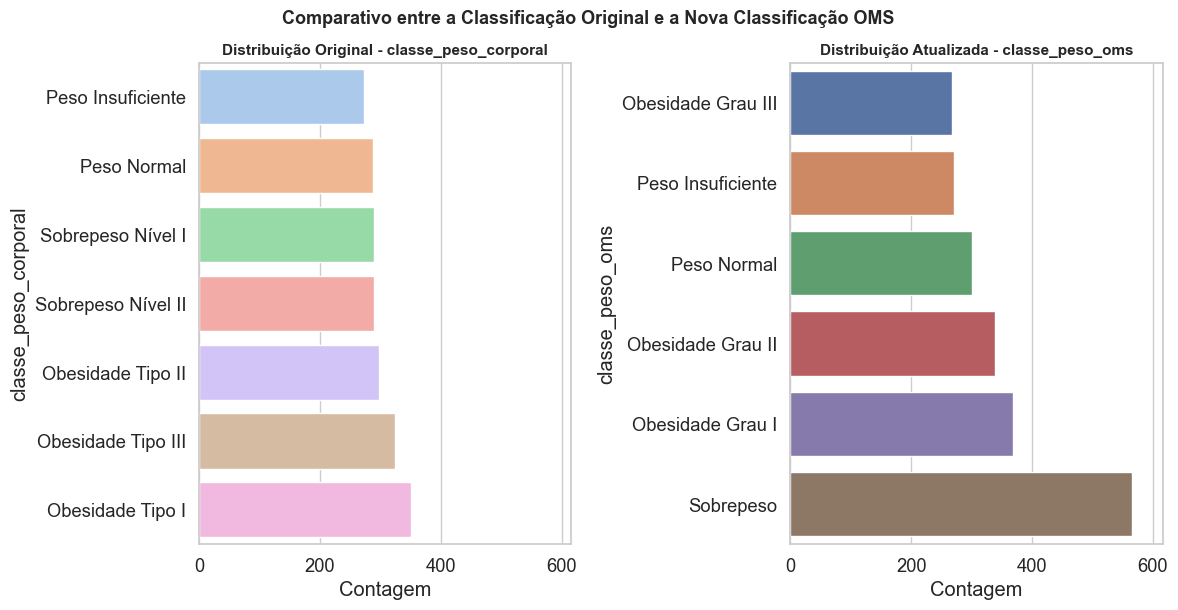

In [28]:
#Caminho para salvar a imagem
output_dir = os.path.join(project_root, 'reports', 'figures')
os.makedirs(output_dir, exist_ok=True)

#Calcula as contagens
contagem_original = df_silver["classe_peso_corporal"].value_counts().sort_values()
contagem_oms = df_silver["classe_peso_oms"].value_counts().sort_values()

#Define o limite máximo comum no eixo X
max_limit = max(contagem_original.max(), contagem_oms.max()) + 50  # +50 apenas pra margem visual

#Criação dos gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#Gráfico da classificação original
sns.barplot(
    x=contagem_original.values,
    y=contagem_original.index,
    ax=axes[0],
    palette="pastel"
)
axes[0].set_title("Distribuição Original - classe_peso_corporal", fontsize=11, weight='bold')
axes[0].set_xlabel("Contagem")
axes[0].set_xlim(0, max_limit)

#Gráfico da nova classificação OMS
sns.barplot(
    x=contagem_oms.values,
    y=contagem_oms.index,
    ax=axes[1],
    palette="deep"
)
axes[1].set_title("Distribuição Atualizada - classe_peso_oms", fontsize=11, weight='bold')
axes[1].set_xlabel("Contagem")
axes[1].set_xlim(0, max_limit)

plt.tight_layout()

#Título geral
plt.suptitle(
    "Comparativo entre a Classificação Original e a Nova Classificação OMS",
    fontsize=13, weight='bold', y=1.02
)

#Salva com padding extra para não cortar o título
save_path = os.path.join(output_dir, 'comparativo_classificacao_oms.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.3)

plt.show()

In [29]:
df_silver["classe_peso_oms"].value_counts(normalize=True) * 100


classe_peso_oms
Sobrepeso             26.811937
Obesidade Grau I      17.432496
Obesidade Grau II     16.011369
Peso Normal           14.211274
Peso Insuficiente     12.837518
Obesidade Grau III    12.695405
Name: proportion, dtype: float64

#### Exportando CSV para alimentar o Streamlit, visto que o PostegreSQL é local e poderia quebrar o dashboard

In [30]:
#Caminho do CSV final
csv_path = os.path.join(project_root, 'data', 'processed', 'obesity_gold.csv')
os.makedirs(os.path.dirname(csv_path), exist_ok=True)

#Salvar CSV
df_silver.to_csv(csv_path, index=False, encoding='utf-8')
print(f"✅ Dataset salvo em: {csv_path}")


✅ Dataset salvo em: d:\Cursos\FIAP\obesity_project\data\processed\obesity_gold.csv


In [ ]:
#Convertendo CSV 

In [31]:
from sqlalchemy import create_engine
from dotenv import load_dotenv

#Carrega variáveis do .env
load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST", "localhost")
DB_PORT = os.getenv("DB_PORT", "5432")
DB_NAME = os.getenv("DB_NAME")

#Criando conexão com o banco
engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

#Nome da tabela
gold_table_name = "obesity_gold"

#Salvando o dataframe no PostgreSQL
df_silver.to_sql(gold_table_name, engine, index=False, if_exists='replace')

print(f"✅ Tabela '{gold_table_name}' salva com sucesso no PostgreSQL.")

✅ Tabela 'obesity_gold' salva com sucesso no PostgreSQL.
